In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

import pandas as pd
import numpy as np


sys.path.append('..')
from seismiqb import *

from glob import glob
from tqdm.auto import tqdm

# Unstructured cube

In [2]:
print(SeismicGeometry.HEADERS_PRE_FULL)
print(SeismicGeometry.INDEX_PRE)

['FieldRecord', 'TraceNumber', 'TRACE_SEQUENCE_FILE', 'CDP', 'CDP_TRACE', 'offset']
['FieldRecord', 'TraceNumber']


In [3]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_FBP/H2_Pal_ETALON_150ffid.sgy',
    headers=SeismicGeometry.HEADERS_PRE_FULL,
    index_headers = SeismicGeometry.INDEX_PRE,
    collect_stats=True, spatial=True,
)


CPU times: user 16.6 s, sys: 1.24 s, total: 17.8 s
Wall time: 16.9 s


In [4]:
print(geometry)


Geometry for cube              /data/seismic/CUBE_FBP/H2_Pal_ETALON_150ffid.sgy
Current index:                 ['FieldRecord', 'TraceNumber']
Shape:                         [ 152 2335 1001]
Time delay and sample rate:    0, 2.0
Depth of one trace is:         1001
Size of the instance:          0.192 GB

Num of unique amplitudes:      3215735
Mean/std of amplitudes:        1.40591/39634.2
Min/max amplitudes:            -8.62078e+06/8.85764e+06
q01/q99 amplitudes:            -71589.8/73764.4



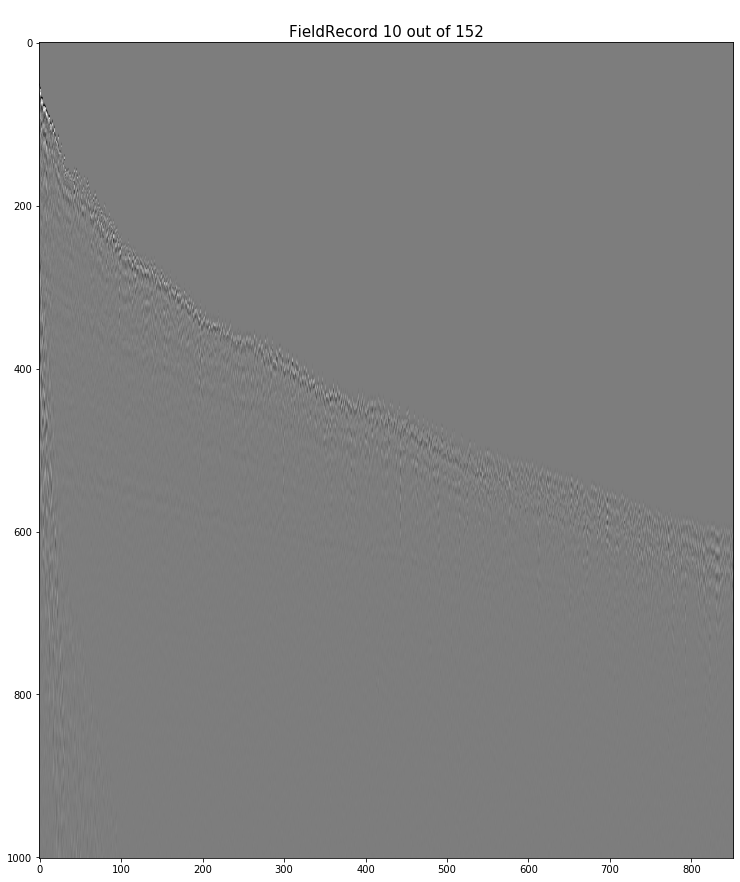

In [5]:
geometry.show_slide(loc=10)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1155: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


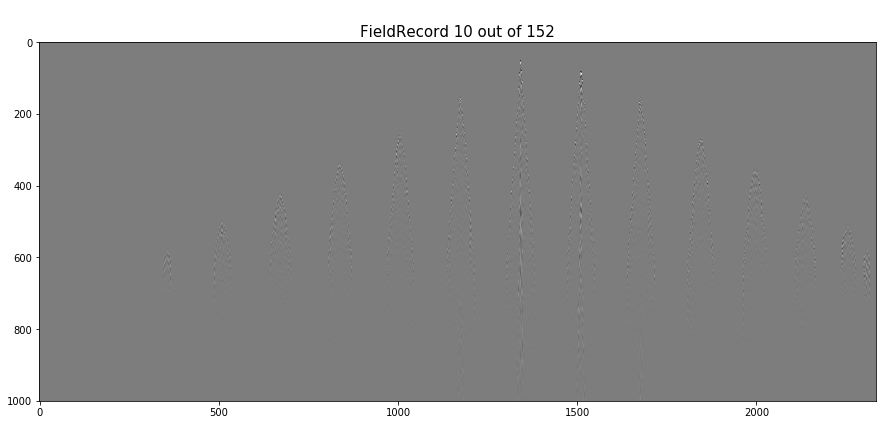

In [6]:
geometry.show_slide(loc=10, stable=False)

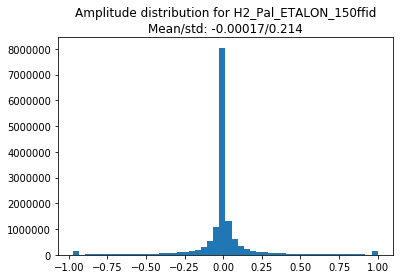

In [7]:
geometry.show_amplitude_hist('q_clip', 50)

In [8]:
%%time
hor = UnstructuredHorizon(
    '/data/seismic/CUBE_FBP/H2_Pal_ETALON_150ffid_picking.csv',
    geometry=geometry,
    names=['FieldRecord', 'TraceNumber', 'file_id', 'FIRST_BREAK_TIME'],
    columns=['FieldRecord', 'TraceNumber', 'FIRST_BREAK_TIME'],
    reader_params={'sep': ',', 'header': 0},
)

CPU times: user 633 ms, sys: 10.9 ms, total: 644 ms
Wall time: 643 ms


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1155: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


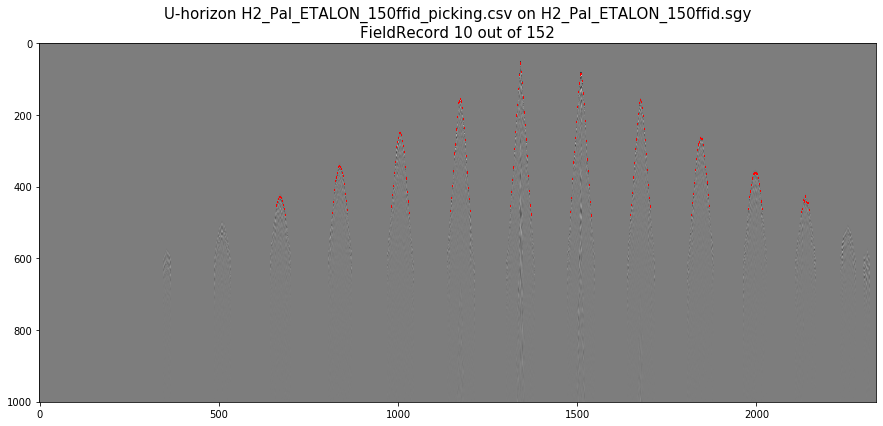

In [9]:
hor.show_slide(10, width=6, stable=False)

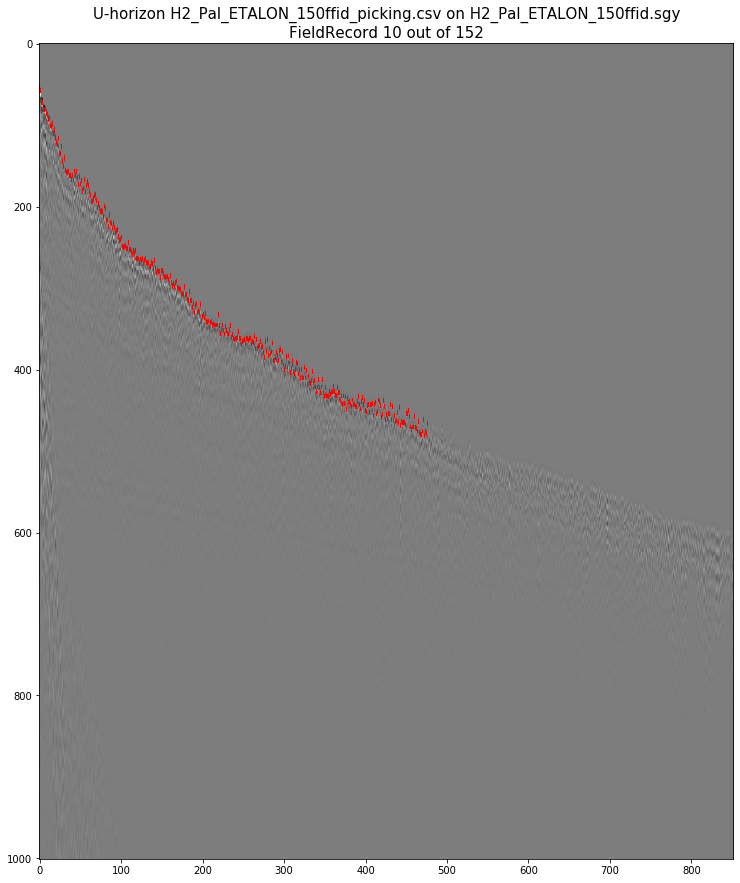

In [10]:
hor.show_slide(10, width=6, stable=True)

# 2D seismic

In [11]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_D2/Line_2786008_LMK.segy',
    headers=SeismicGeometry.HEADERS_PRE_FULL,
    index_headers = ['TraceNumber'],
    collect_stats=True, spatial=False,
)

print(geometry)



Geometry for cube              /data/seismic/CUBE_D2/Line_2786008_LMK.segy
Current index:                 ['TraceNumber']
Shape:                         [ 611 1989]
Time delay and sample rate:    -10, 2.0
Depth of one trace is:         1989
Size of the instance:          0.00908 GB

Num of unique amplitudes:      235
Mean/std of amplitudes:        -0.000738102/14.7291
Min/max amplitudes:            -122.0/ 113.0
q01/q99 amplitudes:             -42.0/  40.0

CPU times: user 301 ms, sys: 33.5 ms, total: 335 ms
Wall time: 326 ms


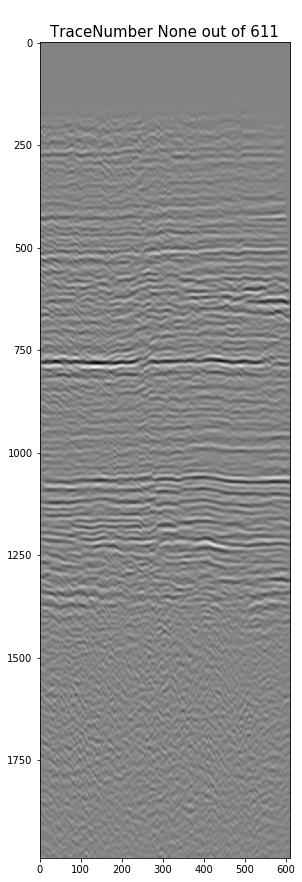

In [12]:
geometry.show_slide()

# Pre-stack

In [13]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_PRE/DN02B_SHOTS_LIFT1.sgy',
    headers=SeismicGeometry.HEADERS_PRE_FULL,
    index_headers=['FieldRecord', 'TraceNumber'],
    collect_stats=True, spatial=True,
)

print(geometry)



Geometry for cube              /data/seismic/CUBE_PRE/DN02B_SHOTS_LIFT1.sgy
Current index:                 ['FieldRecord', 'TraceNumber']
Shape:                         [  51 3456 3001]
Time delay and sample rate:    0, 2.0
Depth of one trace is:         3001
Size of the instance:          0.38 GB

Num of unique amplitudes:      30393252
Mean/std of amplitudes:        -3.69597e-06/0.287747
Min/max amplitudes:            -26.6664/26.9622
q01/q99 amplitudes:            -0.87349/0.874669

CPU times: user 55.5 s, sys: 2.54 s, total: 58 s
Wall time: 56.6 s


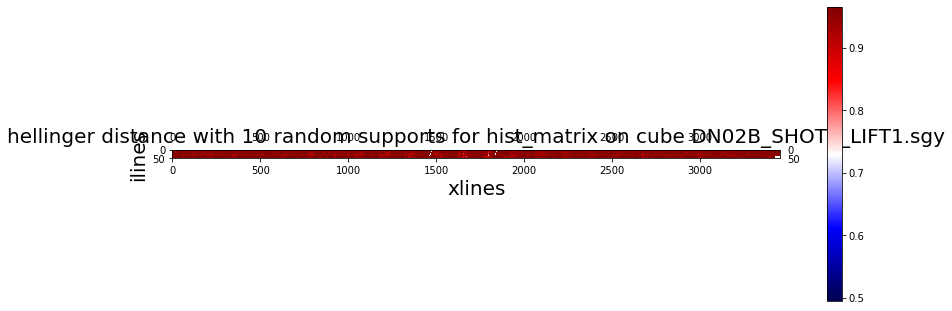

CPU times: user 539 ms, sys: 129 ms, total: 668 ms
Wall time: 666 ms


In [14]:
%%time
gm = GeometryMetrics(geometry)
metric = gm.evaluate('support_hellinger', plot=True)

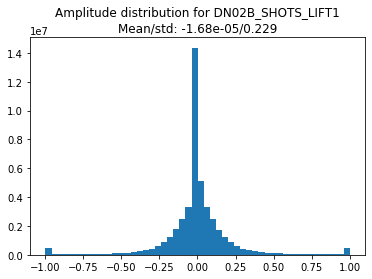

In [15]:
geometry.show_amplitude_hist('q_clip', 50)

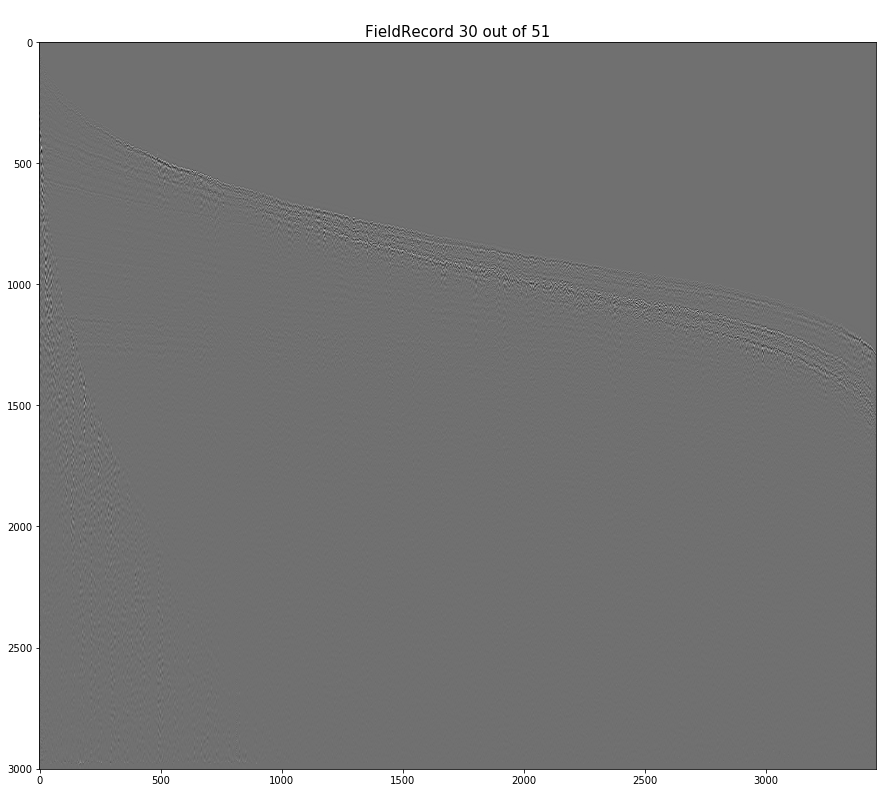

In [16]:
geometry.show_slide(loc=30, axis=0, stable=True)

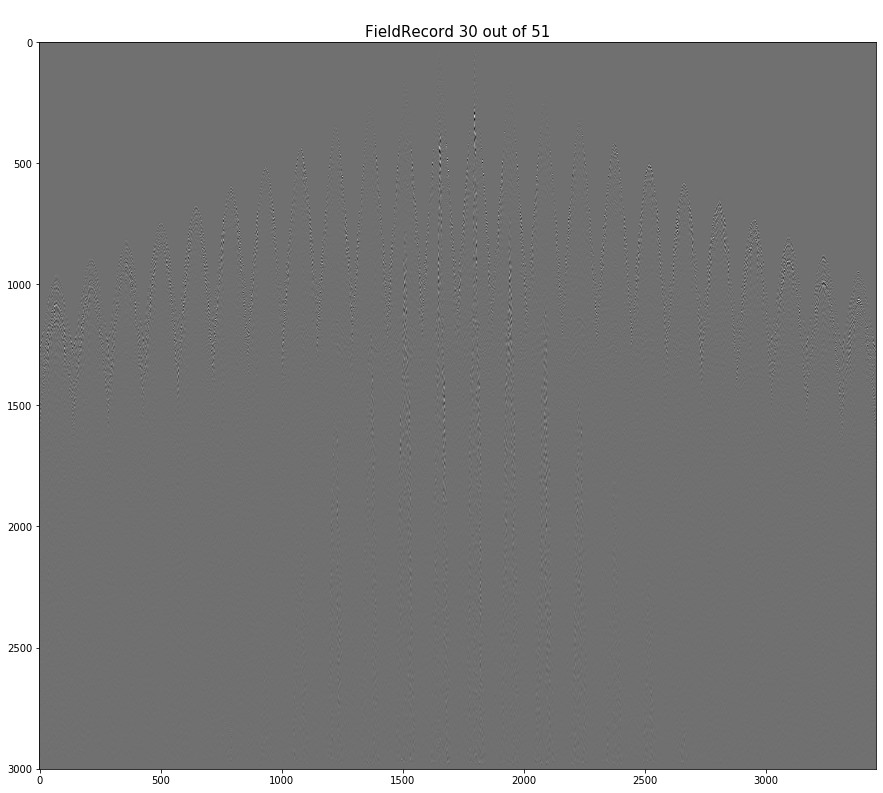

In [17]:
geometry.show_slide(loc=30, stable=False)

In [18]:
geometry.dataframe.columns

Index(['trace_index', 'TRACE_SEQUENCE_FILE', 'CDP', 'CDP_TRACE', 'offset'], dtype='object')

In [19]:
geometry.set_index(['CDP_TRACE', 'offset'])

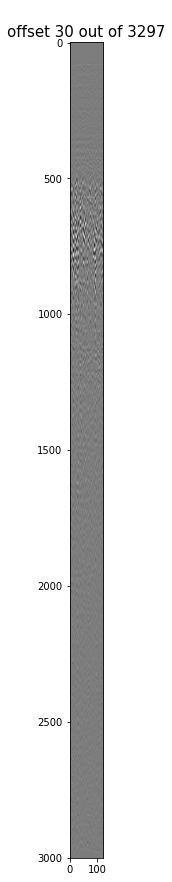

In [20]:
geometry.show_slide(loc=30, axis=1)

# Post stask (inline/crossline index)

In [21]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_2/M_cube.sgy',
    headers=SeismicGeometry.HEADERS_POST_FULL,
    index_headers = SeismicGeometry.INDEX_POST,
    collect_stats=True, spatial=True,
)

print(geometry)



Geometry for cube              /data/seismic/CUBE_2/M_cube.sgy
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Shape:                         [ 418  869 2001]
Time delay and sample rate:    0, 2.0
Depth of one trace is:         2001
Size of the instance:          0.305 GB

Num of unique amplitudes:      238
Mean/std of amplitudes:        -1.21862/4095.97
Min/max amplitudes:            -45939.2/71205.8
q01/q99 amplitudes:            -12403.6/10566.0

CPU times: user 54.9 s, sys: 3.24 s, total: 58.1 s
Wall time: 55.6 s


In [22]:
%%time
hor = UnstructuredHorizon(
    '/data/seismic/CUBE_2/RAW/t0_B_anon',
    geometry=geometry,
    names=['INLINE', '_', 'INLINE_3D', 'XLINE', '__', 'CROSSLINE_3D', 'CDP_X', 'CDP_Y', 'height'],
)

CPU times: user 1.01 s, sys: 95.1 ms, total: 1.11 s
Wall time: 1.11 s


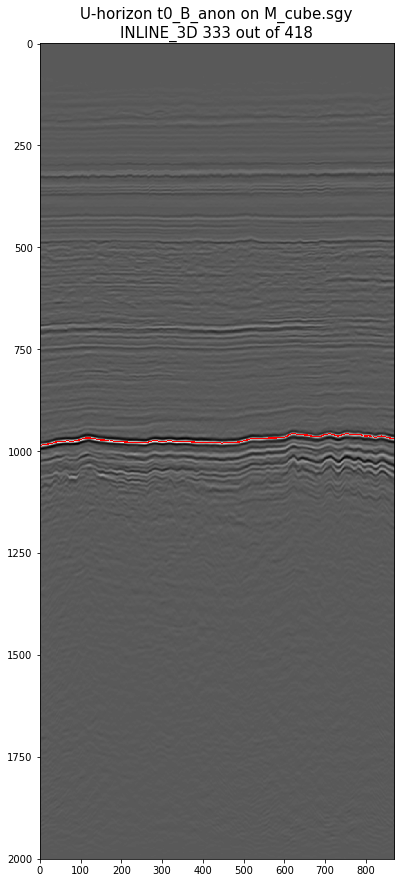

In [23]:
hor.show_slide(loc=333, axis=0)

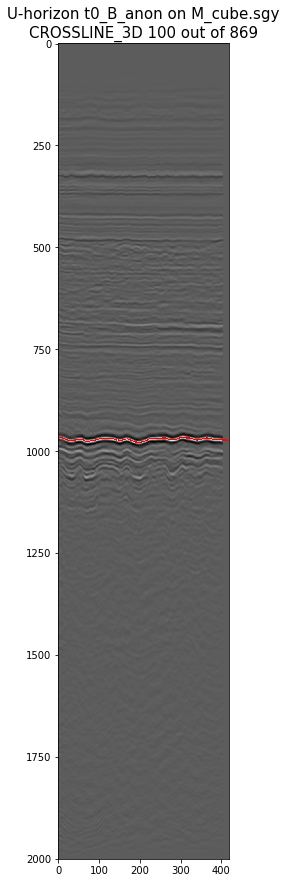

In [24]:
hor.show_slide(loc=100, axis=1)

# Post stack (cdp_x, cdp_y)

In [25]:
SeismicGeometry.INDEX_CDP

['CDP_Y', 'CDP_X']

In [26]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_1/E_anon.sgy',
    headers=SeismicGeometry.HEADERS_POST_FULL,
    index_headers=SeismicGeometry.INDEX_CDP,
)

print(geometry)


Geometry for cube              /data/seismic/CUBE_1/E_anon.sgy
Current index:                 ['CDP_Y', 'CDP_X']
Shape:                         [2563 1409 1501]
Time delay and sample rate:    50, 2.0
Depth of one trace is:         1501
Size of the instance:          0.0673 GB

CPU times: user 755 ms, sys: 798 ms, total: 1.55 s
Wall time: 1.55 s


In [27]:
%%time
hor = UnstructuredHorizon(
    '/data/seismic/CUBE_1/RAW/etp_B_anon',
    geometry=geometry,
    names=['INLINE', '_', 'INLINE_3D', 'XLINE', '__', 'CROSSLINE_3D', 'CDP_X', 'CDP_Y', 'height'],
)

CPU times: user 6.68 s, sys: 594 ms, total: 7.27 s
Wall time: 7.27 s


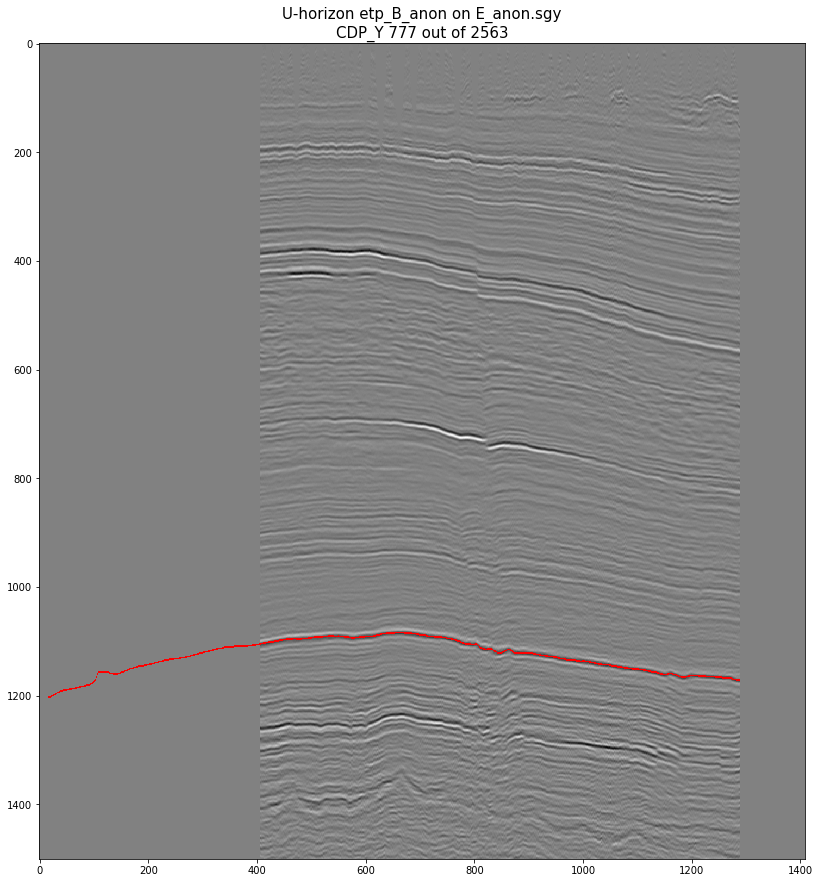

In [28]:
hor.show_slide(loc=777, axis=0)

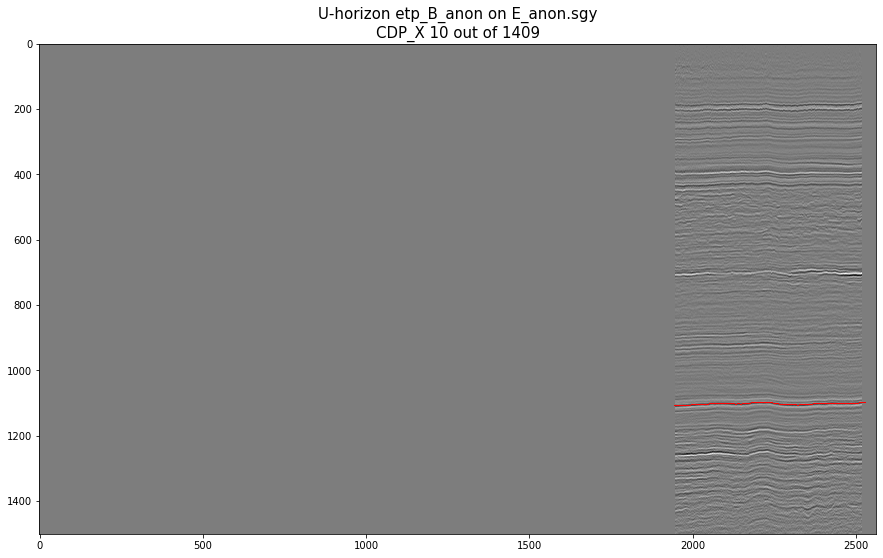

In [29]:
hor.show_slide(loc=10, axis=1, stable=False)

# hdf5 example

In [30]:
%%time
geometry = SeismicGeometry('/data/seismic/CUBE_4/R_cube.hdf5')

print(geometry)


Geometry for cube              /data/seismic/CUBE_4/R_cube.hdf5
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Shape:                         [1472 1380 1071]
Time delay and sample rate:    -280, 4.0
Depth of one trace is:         1071
Size of the instance:          0.555 GB

Num of unique amplitudes:      11153365
Mean/std of amplitudes:        0.000938501/1.45337
Min/max amplitudes:            -38.9136/36.6049
q01/q99 amplitudes:            -4.7137/4.54583

CPU times: user 1.58 s, sys: 264 ms, total: 1.84 s
Wall time: 1.84 s


In [31]:
%%time
grid = geometry.make_quality_grid((200, 200), plot=True, savepath='quality_grid.png')

../seismiqb/src/metrics.py:1336: RuntimeWarning: invalid value encountered in less_equal
  digitized[matrix <= bins[0]] = 1.0
../seismiqb/src/metrics.py:446: RuntimeWarning: Mean of empty slice
  quality_map = getattr(np, reduce_func)(quality_map, axis=-1)


CPU times: user 52.7 s, sys: 10.9 s, total: 1min 3s
Wall time: 1min 3s


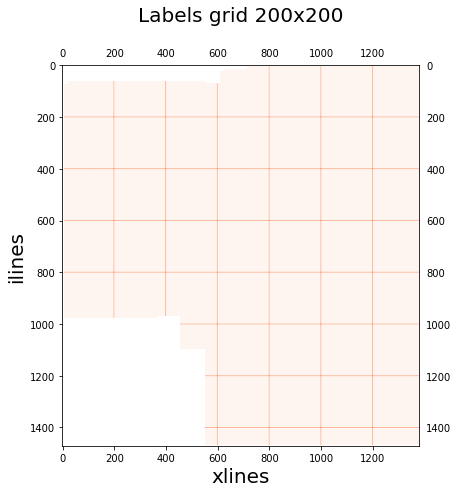

In [32]:
plot_image(geometry.quality_grid, 'Labels grid 200x200',
           rgb=True, savefig='./grid.png',
           cmap='Reds', interpolation='bilinear')

In [33]:
%%time
horizon = Horizon('/data/seismic/CUBE_4/BEST_HORIZONS/H_Kn.txt', geometry)
horizon.filter_points()

print(horizon)


Horizon H_Kn.txt for R_cube.hdf5 loaded from file
Ilines range:      25 to 1346
Xlines range:      9 to 1370
Heights range:     91 to 505
Heights mean:      286.159
Heights std:       92.9769

Length:            1494219
Perimeter:         5366
Coverage:          0.86467
Solidity:          1.0
Num of holes:      0

CPU times: user 1.71 s, sys: 74.9 ms, total: 1.78 s
Wall time: 1.78 s


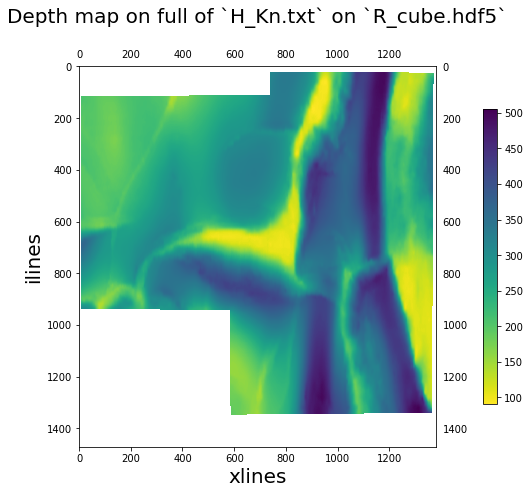

In [34]:
horizon.show()

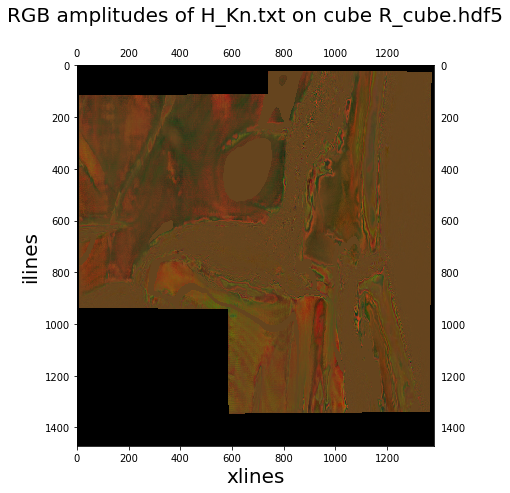

In [35]:
horizon.show_amplitudes_rgb(11)

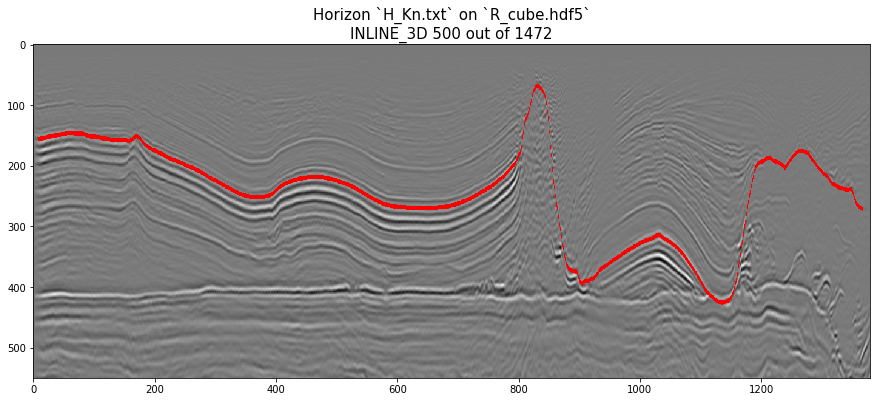

In [36]:
horizon.show_slide(500, width=7, axis=0, heights=slice(50, 600))

# ACF

In [37]:
%%time

geometry_pre = SeismicGeometry(
    '/data/seismic/CUBE_ACF/H2_STK_Before_SCDEC.sgy',
    headers=SeismicGeometry.HEADERS_PRE_FULL + SeismicGeometry.HEADERS_POST_FULL,
    index_headers=SeismicGeometry.INDEX_POST,
    collect_stats=True, spatial=False,
)

geometry_after = SeismicGeometry(
    '/data/seismic/CUBE_ACF/H2_STK_SCDEC_200ms_16ms.sgy',
    headers=SeismicGeometry.HEADERS_PRE_FULL + SeismicGeometry.HEADERS_POST_FULL,
    index_headers=SeismicGeometry.INDEX_POST,
    collect_stats=True, spatial=False,
)


CPU times: user 4.17 s, sys: 850 ms, total: 5.02 s
Wall time: 4.86 s


In [38]:
from numba import njit, float32

@njit
def calc_root(arr, i):
    k = arr[i+1] - arr[i]
    b = arr[i] - k*i
    root = - (b / k)
    return root

@njit
def calc_ac_params(trace, num_shifts=-1):
    k0 = float32(0) # Shift at which AC changes sign first time
    trace_length = len(trace)
    ac = np.zeros(trace_length, dtype=np.float32) # AC values
    der = np.zeros(trace_length-1, dtype=np.float32) # AC derivative
    der_sign_changes = 0 # Number of times AC derivative changes sign
    amps = np.zeros(2, dtype=np.float32) # Container for amplitudes

    ac[0] = np.dot(trace, trace) # Calculate AC for k=0 out of loop
    k = 1 # AC shift
    while True:
        ac[k] = np.dot(trace[k:], trace[:-k])

        if k0 == 0 and np.sign(ac[k]) != np.sign(ac[k-1]):
            k0 = calc_root(ac, k-1)

        der[k-1] = ac[k] - ac[k-1]

        if k > 1:
            if np.sign(der[k-1]) != np.sign(der[k-2]):
                der_sign_changes += 1
        k += 1

        if der_sign_changes >= 2 and k >= num_shifts:
            break
    amps[0] = np.min(ac[int(k0):])
    amps[1] = np.max(ac[int(k0):])
    amps = amps / ac[0]
    return k0, amps

@njit
def _compare_ac_params(trace_before, trace_after, num_shifts=-1):
    k0_before, amps_before = calc_ac_params(trace_before, num_shifts)
    k0_after, amps_after = calc_ac_params(trace_after, num_shifts)
    k0_diff = (k0_after - k0_before) / max(1, k0_before) * 100
    amps_diff = (amps_after - amps_before) / amps_before * 100

    return k0_diff, amps_diff[0], amps_diff[1]

def compare_ac_params(trace_before, trace_after, window=None, num_shifts=-1):
    if window:
        trace_before = trace_before[window]
        trace_after = trace_after[window]
        
    return _compare_ac_params(trace_before, trace_after, num_shifts=num_shifts)

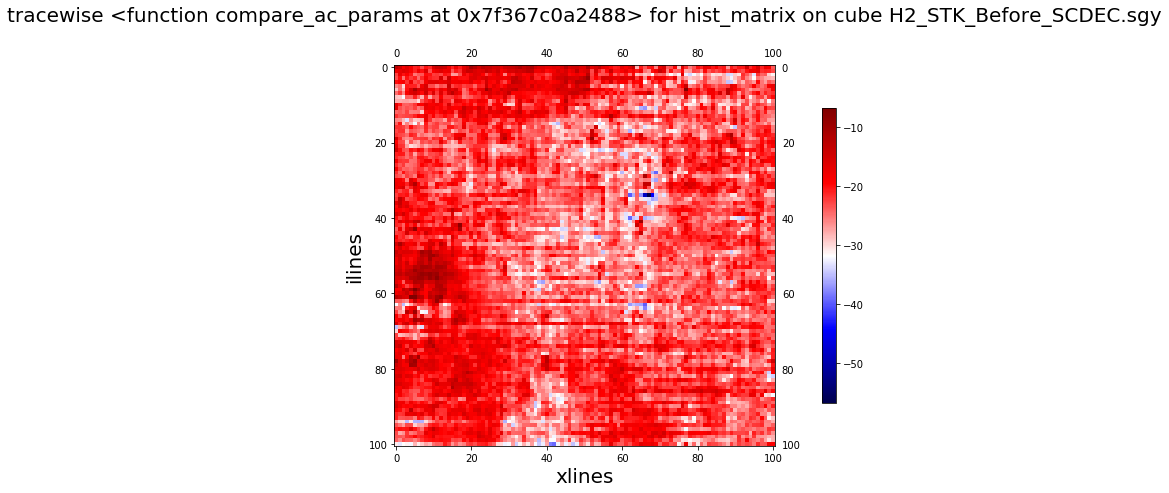

CPU times: user 2.69 s, sys: 156 ms, total: 2.85 s
Wall time: 2.7 s


In [39]:
%%time
gm = GeometryMetrics((geometry_pre, geometry_after))
metric = gm.evaluate(
    'tracewise', func=compare_ac_params, l=3, agg=0, num_shifts=10,
    plot=True, plot_kwargs={'cmap' :'seismic'},
)

In [40]:
def diff_mean(array_1, array_2):
#     return np.max(array_1 - array_2)
    return np.mean(array_1) - np.mean(array_2)

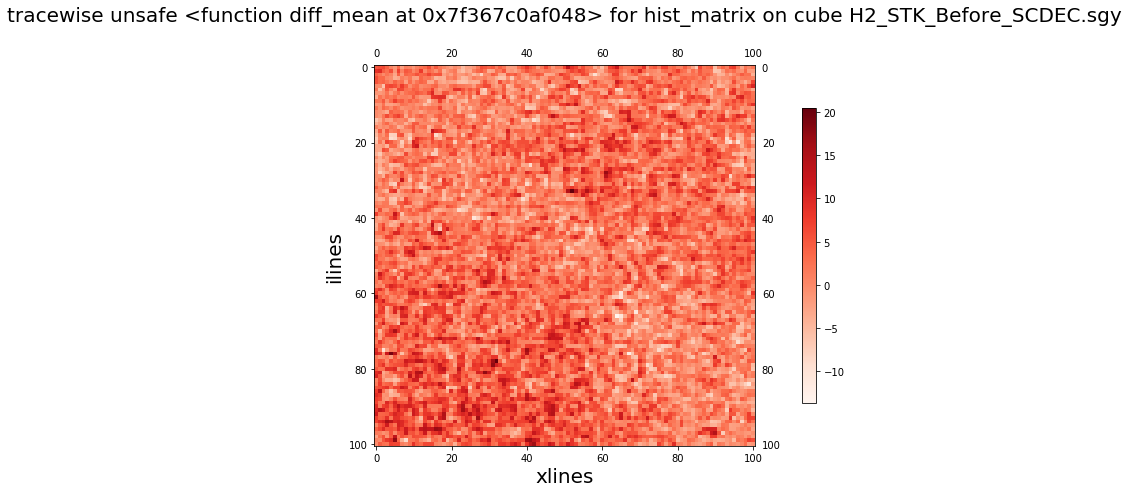

CPU times: user 1.31 s, sys: 274 ms, total: 1.58 s
Wall time: 1.31 s


In [41]:
%%time
gm = GeometryMetrics((geometry_pre, geometry_after))
metric = gm.evaluate(
    'tracewise_unsafe', func=diff_mean, l=1, agg=None,
    plot=True, plot_kwargs={'cmap' :'Reds'},
)

# Metrics example

In [42]:
%%time
geometry = SeismicGeometry('/data/seismic/CUBE_1/E_anon.hdf5')
print(geometry)


Geometry for cube              /data/seismic/CUBE_1/E_anon.hdf5
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Shape:                         [2563 1409 1501]
Time delay and sample rate:    50, 2.0
Depth of one trace is:         1501
Size of the instance:          0.919 GB

Num of unique amplitudes:      190
Mean/std of amplitudes:        0.020945/1885.87
Min/max amplitudes:            -47429.4/39240.2
q01/q99 amplitudes:            -5459.5/5118.29

CPU times: user 674 ms, sys: 421 ms, total: 1.1 s
Wall time: 1.09 s


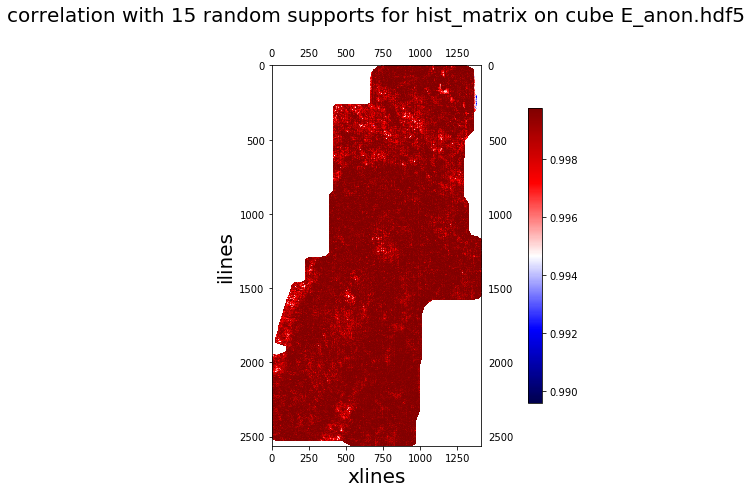

CPU times: user 5.2 s, sys: 2.57 s, total: 7.77 s
Wall time: 7.78 s


In [43]:
%%time
gm = GeometryMetrics(geometry)
metric = gm.evaluate('support_corrs', supports=15, agg='mean', plot=True)

In [44]:
%%time
grid = geometry.make_quality_grid((20, 200), plot=True, savepath='quality_grid.png')

../seismiqb/src/metrics.py:1336: RuntimeWarning: invalid value encountered in less_equal
  digitized[matrix <= bins[0]] = 1.0
../seismiqb/src/metrics.py:446: RuntimeWarning: Mean of empty slice
  quality_map = getattr(np, reduce_func)(quality_map, axis=-1)


CPU times: user 1min 23s, sys: 19.1 s, total: 1min 42s
Wall time: 1min 42s


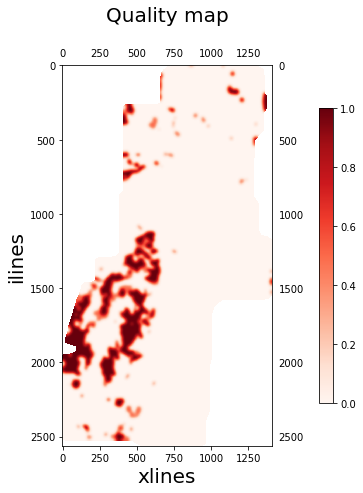

In [45]:
plot_image(geometry.quality_map, 'Quality map', cmap='Reds')

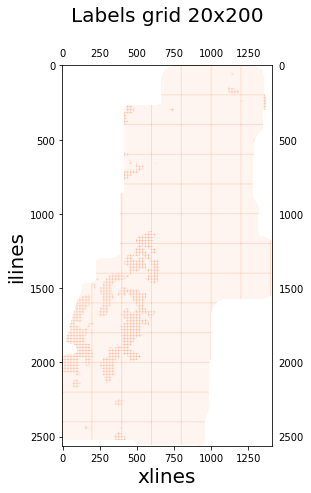

In [46]:
plot_image(geometry.quality_grid, 'Labels grid 20x200',
           rgb=True, cmap='Reds', interpolation='bilinear')

In [47]:
%%time
horizon = Horizon('/data/seismic/CUBE_1/RAW/etp_B_anon', geometry)
horizon.filter_points()

print(horizon)


Horizon etp_B_anon for E_anon.hdf5 loaded from file
Ilines range:      0 to 2559
Xlines range:      1 to 1403
Heights range:     1060 to 1214
Heights mean:      1130.12
Heights std:       37.6547

Length:            2424324
Perimeter:         8242
Coverage:          0.99528
Solidity:          1.0
Num of holes:      0

CPU times: user 2.86 s, sys: 275 ms, total: 3.13 s
Wall time: 3.13 s


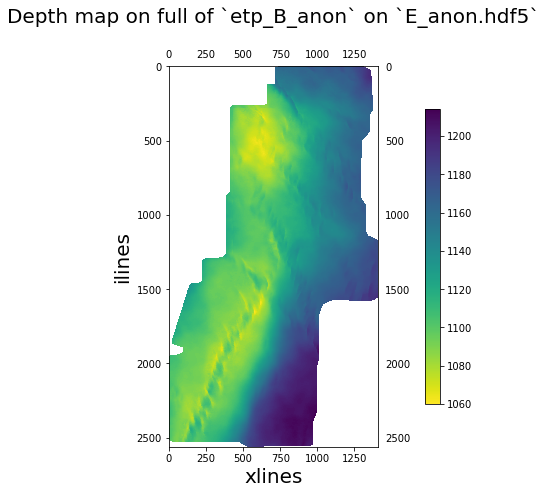

In [48]:
horizon.show()

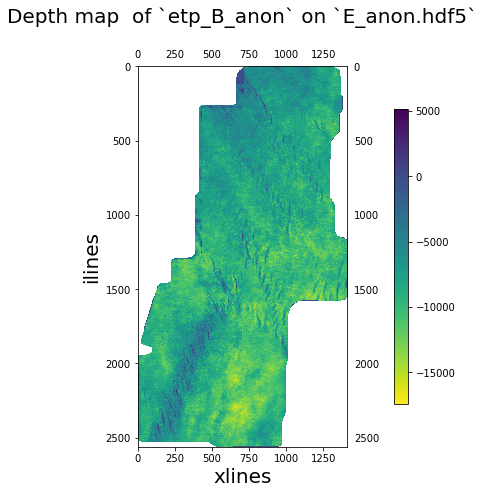

In [49]:
horizon.show('amplitudes', on_full=False)

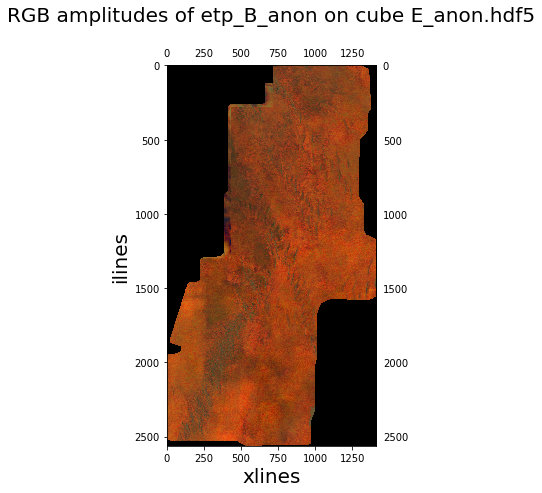

In [50]:
horizon.show_amplitudes_rgb(3)

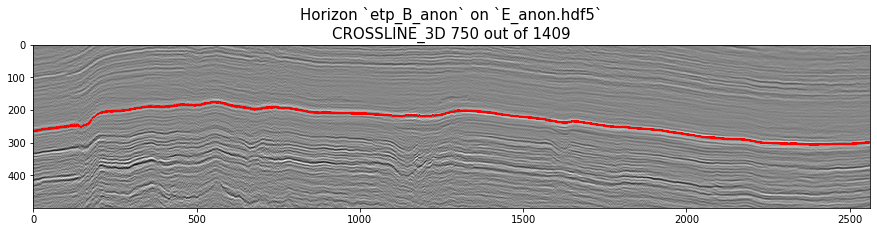

In [51]:
horizon.show_slide(750, width=7, axis=1, heights=slice(900, 1400))

../seismiqb/src/metrics.py:560: RuntimeWarning: invalid value encountered in true_divide
  self._probs = hist_matrix / np.sum(hist_matrix, axis=-1, keepdims=True) + self.EPS


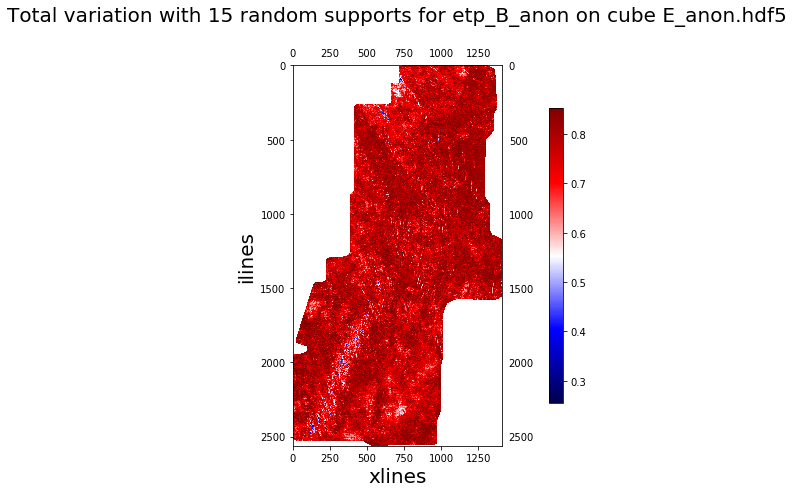

CPU times: user 10.8 s, sys: 5.64 s, total: 16.4 s
Wall time: 16.4 s


In [52]:
%%time
hm = HorizonMetrics(horizon)
metric = hm.evaluate('support_tv', supports=15, agg='mean', plot=True)

../seismiqb/src/metrics.py:985: RuntimeWarning: invalid value encountered in true_divide
  temp = cov / (support_stds[i] * data_stds)


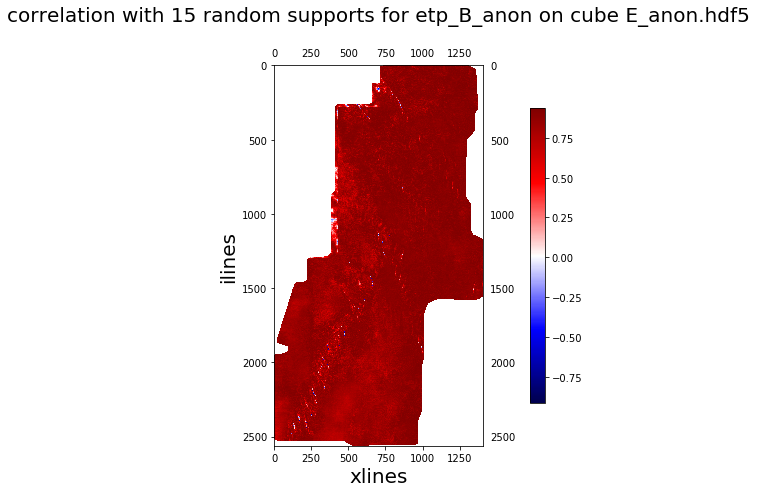

CPU times: user 5.17 s, sys: 2.35 s, total: 7.52 s
Wall time: 7.53 s


In [53]:
%%time
metric = hm.evaluate('support_corrs', supports=15, agg='mean', plot=True)

../seismiqb/src/metrics.py:1336: RuntimeWarning: invalid value encountered in less_equal
  digitized[matrix <= bins[0]] = 1.0
../seismiqb/src/metrics.py:446: RuntimeWarning: Mean of empty slice
  quality_map = getattr(np, reduce_func)(quality_map, axis=-1)


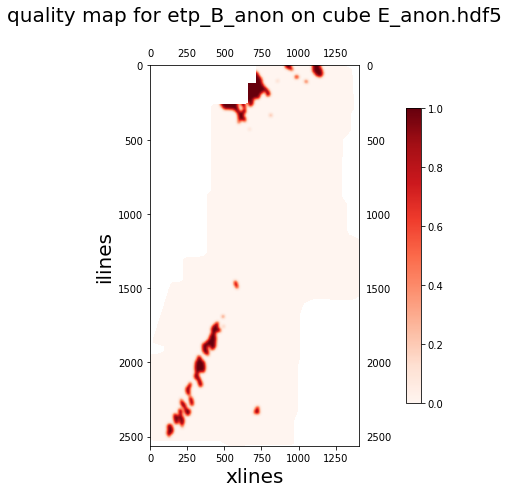

CPU times: user 39.7 s, sys: 11.2 s, total: 50.9 s
Wall time: 50.8 s


In [54]:
%%time
quality_map = hm.evaluate('quality_map', quantiles=[0.03], agg=None,
                           metric_names=['support_btch', 'support_hellinger'],
                           plot=True)

# Compare two horizons

In [55]:
%%time
horizon_2 = Horizon('/data/seismic/CUBE_1/RAW/etp_BP10_anon', geometry)
horizon_2.filter_points()
print(horizon_2)


Horizon etp_BP10_anon for E_anon.hdf5 loaded from file
Ilines range:      0 to 2559
Xlines range:      1 to 1403
Heights range:     908 to 1076
Heights mean:      980.459
Heights std:       43.4773

Length:            2424324
Perimeter:         8242
Coverage:          0.99528
Solidity:          1.0
Num of holes:      0

CPU times: user 3.04 s, sys: 151 ms, total: 3.19 s
Wall time: 3.19 s


In [56]:
hm = HorizonMetrics((horizon, horizon_2))


Comparing horizons:       etp_B_anon
                          etp_BP10_anon
—————————————————————————————————————————————

Rate in 5ms:                              0.0
Mean/std of errors:          149.7 /    7.127
Mean/std of abs errors:      149.7 /    7.127
Max error/abd error:           174 /      174
—————————————————————————————————————————————

Lengths of horizons:                  2424324
                                      2424324
—————————————————————————————————————————————
Average heights of horizons:         1.13e+03
                                        980.5
—————————————————————————————————————————————
Coverage of horizons:                  0.9953
                                       0.9953
—————————————————————————————————————————————
Solidity of horizons:                     1.0
                                          1.0
—————————————————————————————————————————————
Number of holes in horizons:                0
                                            0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


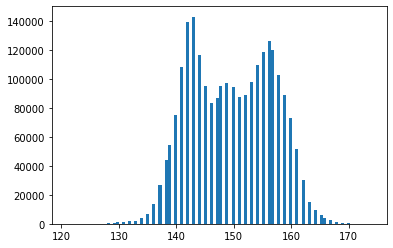

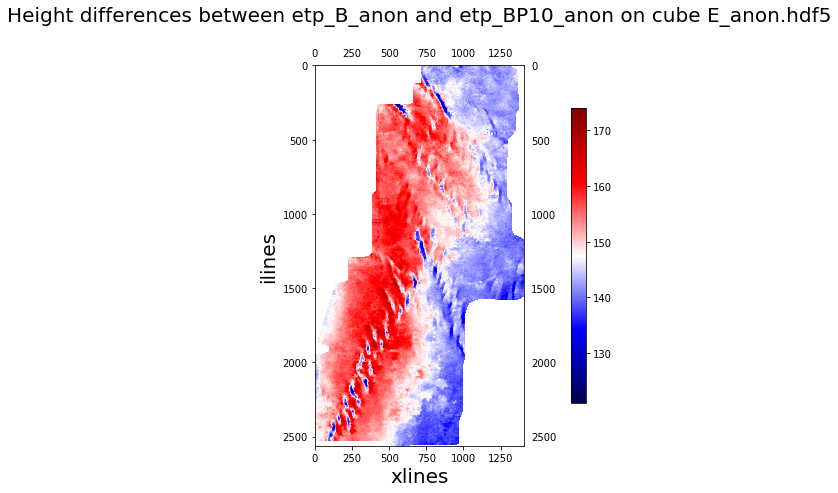

In [57]:
l1 = hm.evaluate('compare', agg=None, plot=True)

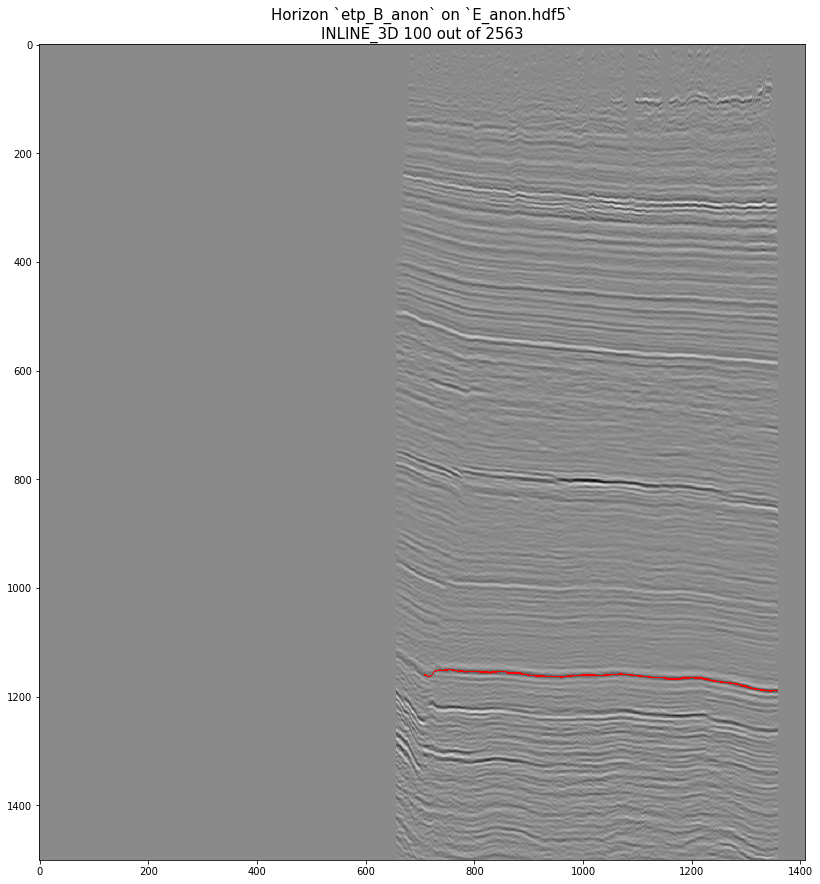

In [58]:
horizon.show_slide(100)

# River estuaries

In [59]:
%%time
geometry = SeismicGeometry('/data/seismic/CUBE_3/P_cube.hdf5')
print(geometry)


Geometry for cube              /data/seismic/CUBE_3/P_cube.hdf5
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Shape:                         [2737 2599 2001]
Time delay and sample rate:    0, 2.0
Depth of one trace is:         2001
Size of the instance:          1.71 GB

Num of unique amplitudes:      245
Mean/std of amplitudes:        1.5062/4629.47
Min/max amplitudes:            -67756.3/77435.8
q01/q99 amplitudes:            -14803.9/14234.5

CPU times: user 733 ms, sys: 734 ms, total: 1.47 s
Wall time: 1.46 s


In [60]:
%%time
horizon = Horizon('/data/seismic/CUBE_3/RIVER_RAW/Horizon', geometry)
horizon.filter_points()
print(horizon)


Horizon Horizon for P_cube.hdf5 loaded from file
Ilines range:      0 to 2736
Xlines range:      0 to 2597
Heights range:     1078 to 1196
Heights mean:      1169.06
Heights std:       9.15581

Length:            3898501
Perimeter:         11017
Coverage:          0.99988
Solidity:          1.0
Num of holes:      1

CPU times: user 4.3 s, sys: 374 ms, total: 4.67 s
Wall time: 4.67 s


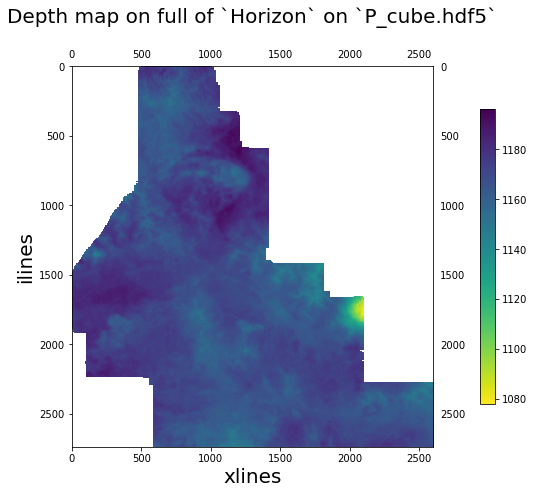

In [61]:
horizon.show()

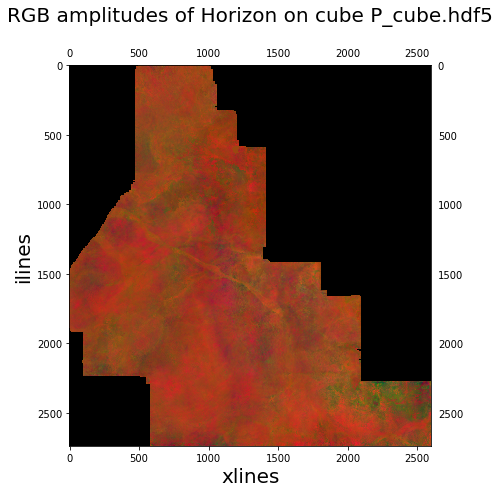

In [62]:
horizon.show_amplitudes_rgb(4)